In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib notebook

In [ ]:
def creat_annulus(target,mask,thick):
    outerannulus = np.multiply(flat_subtracted,mask)
    innerannulus = np.multiply(flat_subtracted,thick)
    aperture     = np.multiply(flat_subtracted,target)
    outerannulus[np.isnan(outerannulus)] = 0
    innerannulus[np.isnan(innerannulus)] = 0
    aperture[np.isnan(aperture)]         = 0
    annulus = np.subtract(outerannulus,innerannulus)
    avg_annulus = np.sum(annulus)/np.count_nonzero(annulus)
    starcounts  = np.sum(aperture)-(avg_annulus*np.count_nonzero(aperture))
    uncertainty = np.sqrt(starcounts+np.sum(aperture)+np.count_nonzero(aperture)*(10**2))
    return starcounts,uncertainty

Input X-Axis: 280
Input Y-Axis: 242
Input Aperture Radius: 10
Input Inner Annulus' Radius: 20
Input Outer Annulus' Radius: 40


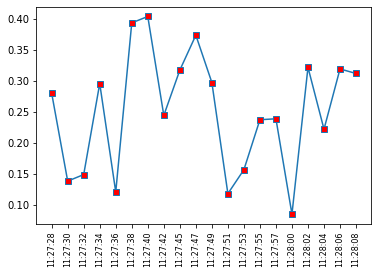

In [11]:
if __name__ == "__main__":
    np.seterr(divide='ignore',invalid='ignore')
    fits_file = "/data/tnorecon/RECON_clean/yakima/"
    fits_dark = fits.getdata(fits_file+"20201021/20201021_4.dark")
    fits_flat = fits.getdata(fits_file+"20201021/20201021_3.flat")
    normalize = fits_flat/(np.median(fits_flat))
    y_arr,x_arr = np.shape(fits_flat)
    y_arr,x_arr = np.ogrid[:y_arr,:x_arr]
    x_axis  = int(input("Input X-Axis: "))
    y_axis  = int(input("Input Y-Axis: "))
    radius  = int(input("Input Aperture Radius: "))
    radiii  = int(input("Input Inner Annulus' Radius: "))
    scopes  = int(input("Input Outer Annulus' Radius: "))
    if radius < radiii < scopes:
        reference_mask      = (x_arr-273)**2 + (y_arr-325)**2 <= scopes**2
        reference_aperture  = (x_arr-273)**2 + (y_arr-325)**2 <= radius**2
        reference_thickness = (x_arr-273)**2 + (y_arr-325)**2 <= radiii**2
        target_mask         = (x_arr-x_axis)**2 + (y_arr-y_axis)**2 <= scopes**2
        target_aperture     = (x_arr-x_axis)**2 + (y_arr-y_axis)**2 <= radius**2
        target_thickness    = (x_arr-x_axis)**2 + (y_arr-y_axis)**2 <= radiii**2
        CompArray = []
        DataArray = []
        FrameTime = []
        pass
    else:
        sys.exit("Please Imput Valid Values")
    for reconFiles in range(100,120):
        fits_data,header= fits.getdata(fits_file+f"20201021/20201021_2/00{reconFiles}.fits",header=True)
        dark_subtracted = np.subtract(fits_data,fits_dark)
        flat_subtracted = np.true_divide(dark_subtracted,normalize)
        DataArray.append(creat_annulus(target_aperture,target_mask,target_thickness))
        CompArray.append(creat_annulus(reference_aperture,reference_mask,reference_thickness))
        FrameTime.append(header['DATE-OBS'])
    DataCountsArray = []
    DataUncertainty = []
    for each in DataArray:
        DataCountsArray.append(each[0])
        DataUncertainty.append(each[1])
    CompCountsArray = []
    CompUncertainty = []
    for each in CompArray:
        CompCountsArray.append(each[0])
        CompUncertainty.append(each[1])
    for index,each in enumerate(FrameTime):
        FrameTime[index]=each[11:19]
    differential  = [int(a)/int(b) for a,b in zip(DataCountsArray,CompCountsArray)]
    plt.errorbar(FrameTime,differential,marker='s',mfc='red')
    plt.rc('xtick',labelsize=8)
    plt.xticks(rotation=90)

## 